In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

pd.options.display.max_seq_items = 500
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [2]:
# importing data
wine = pd.read_csv('winemag-data_first150k.csv')

In [3]:
def counter(dframe):
    counting = 0
    #print(dframe.isnull())
    for i in dframe.isnull():
        if i == True:
            counting += 1
    return counting

In [4]:
# displying data structure
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [5]:
wine.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [6]:
wine.describe().T

/Users/julien/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,count,mean,std,min,25%,50%,75%,max
points,150930.0,87.888418,3.222392,80.0,86.0,88.0,90.0,100.0
price,137235.0,33.131482,36.322536,4.0,NaN,NaN,NaN,2300.0


In [7]:
wine = wine.dropna(subset=['price'])
counter(wine['price'])

0

In [8]:
wine['points_bins'] = pd.qcut(wine['points'], q=5, 
                              labels=['very low','low', 'medium', 'high', 'very high'])


In [9]:
wine_price_cap = wine[wine.price < 200] 
print(len(wine_price_cap))

136368


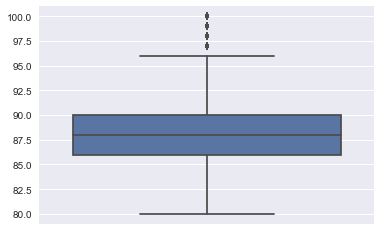

In [10]:
sns.boxplot(y=['points'], data=wine, showfliers=True)

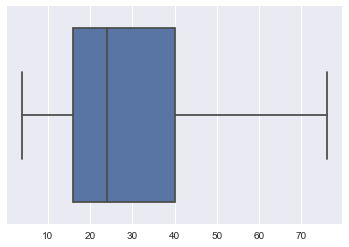

In [11]:
sns.boxplot(x=['price'], data=wine, showfliers=False)

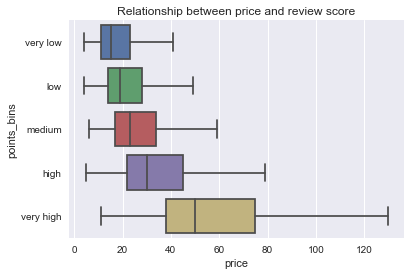

In [12]:
sns.boxplot(y='points_bins',x='price', data=wine_price_cap, showfliers=False)
sns.plt.title('Relationship between price and review score')
sns.plt.savefig('comp_price_points_bins')

In [13]:
wine_price_cap.describe()

,points,price
count,136368.000000,136368.000000
mean,87.746018,31.272755
std,3.181218,23.660380
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,199.000000


In [14]:
wine_price_cap.head(2)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,very high


In [15]:
len(wine) - len(wine_price_cap)

867

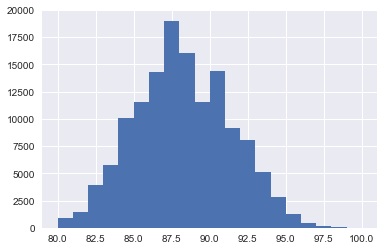

In [16]:
# plot distribution of intended target variable:
wine_price_cap['points'].hist(bins=20, figsize=(6,4))

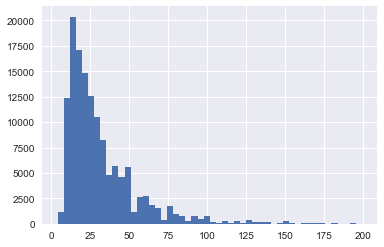

In [17]:
wine_price_cap['price'].hist(bins=50, figsize=(6,4))

In [18]:
print(len(wine_price_cap.country.value_counts()))
print(len(wine_price_cap.description.value_counts()))
print(len(wine_price_cap.designation.value_counts()))
print(len(wine_price_cap.province.value_counts()))
print(len(wine_price_cap.region_1.value_counts()))
print(len(wine_price_cap.region_2.value_counts()))
print(len(wine_price_cap.variety.value_counts()))
print(len(wine_price_cap.winery.value_counts()))

46
88532
28175
446
1184
18
619
13826


In [19]:
wine_grouped = wine.groupby(['country'])

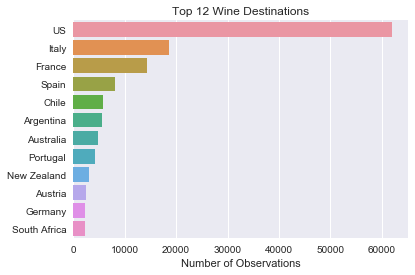

In [20]:
sns.barplot(y=wine_price_cap.country.value_counts()[:12].index,
            x=wine_price_cap.country.value_counts()[:12].values, orient="h")
sns.plt.title('Top 12 Wine Destinations')
sns.plt.xlabel('Number of Observations')
sns.plt.savefig('country_count.png')

In [21]:
wine_price_cap.country.value_counts()[:15]

US              62021
Italy           18641
France          14375
Spain            8102
Chile            5753
Argentina        5580
Australia        4855
Portugal         4156
New Zealand      3070
Austria          2480
Germany          2294
South Africa     2237
Greece            872
Israel            610
Hungary           228
Name: country, dtype: int64

In [22]:
wine_country_cap = wine_price_cap[
    wine_price_cap.country.isin(wine_price_cap.country.value_counts()[:12].index)]

In [23]:
wine_country_cap[['country','description','points','price']].head(5)

,country,description,points,price
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0
4,France,"This is the top wine from La Bégude, named aft...",95,66.0
5,Spain,"Deep, dense and pure from the opening bell, th...",95,73.0


In [24]:
wine_country_cap.describe()

,points,price
count,133564.000000,133564.000000
mean,87.773075,31.388016
std,3.185501,23.738142
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,199.000000


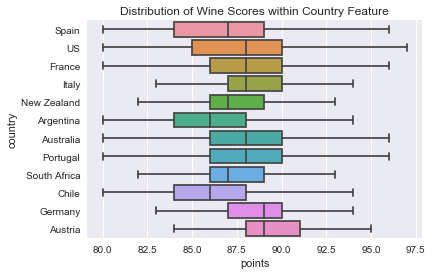

In [25]:
sns.boxplot(x='points',y='country', data=wine_country_cap, orient='h', showfliers=False)
sns.plt.title('Distribution of Wine Scores within Country Feature')
sns.plt.savefig('country_points.png')

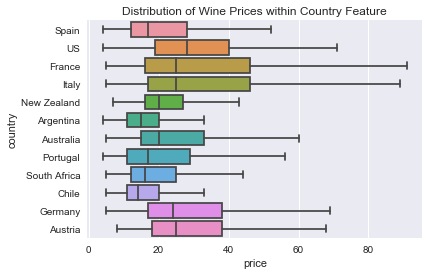

In [26]:
sns.boxplot(x='price',y='country', data=wine_country_cap, orient='h',showfliers=False)
sns.plt.title('Distribution of Wine Prices within Country Feature')
sns.plt.savefig('country_prices2.png')

## Step 2: Decision Trees - Regression

In [27]:
# import Sklean modules
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
def DT_validation_n_leafs(inputs, X_test, X_train, y_train, y_test):
    '''
    function to analyse different parameters for the Dicision Tree Regression
    outputs a matrix with various validation metrics
    '''
     
    mae_train = []
    mae_test = []
    mse_train = []
    mse_test = []
    rsq_train = []
    rsq_test = []
    
    for i in inputs:
        model = DecisionTreeRegressor(min_samples_leaf=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        y_training_pred = model.predict(X_train)
        
        mae_train.append(mean_absolute_error(y_training_pred, y_train))
        mae_test.append(mean_absolute_error(y_pred, y_test))
        mse_train.append(mean_squared_error(y_training_pred, y_train))
        mse_test.append(mean_squared_error(y_pred, y_test))
        rsq_train.append(model.score(X_train, y_train))
        rsq_test.append(model.score(X_test, y_test))
        print('Calculating model {0} of {1}'.format(i,len(inputs)))
        
    test_matrix = pd.DataFrame(
        {'MAE over training set': mae_train,
        'MAE over test set': mae_test,
        'MSE over training set': mse_train,
        'MSE over test set': mse_test,
        'R^2 over training set': rsq_train,
        'R^2 over test set': rsq_test},index=inputs)
    
    return test_matrix

In [29]:
# points = target
# features = [price, country]

In [30]:
wine_country_cap.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high


In [31]:
# convert country column into dummy varables
wine_country_dummy = pd.get_dummies(wine_country_cap['country'])
wine_country_cap_dummy = pd.concat([wine_country_cap, wine_country_dummy], axis=1)
wine_country_cap_dummy.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins,Argentina,Australia,Austria,Chile,France,Germany,Italy,New Zealand,Portugal,South Africa,Spain,US
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
X = wine_country_cap_dummy[['price','Argentina','Australia','Austria','Chile',
                            'France','Germany','Italy','New Zealand','Portugal',
                            'South Africa','Spain','US']]
X = np.array(X)
y = wine_country_cap_dummy['points']
y = np.array(y)

In [33]:
# create train and test sets for ML
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [34]:
# create the validation set
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [35]:
# new training set is smaller:
print('size of original trainnig set:                ', X_train.shape)
print('size of new (after vali. split) trainnig set: ', X_train2.shape)

size of original trainnig set:                 (113529, 13)
size of new (after vali. split) trainnig set:  (90823, 13)


In [36]:
DT_validation_n_leafs([1,5,10,50,100,1000], X_train=X_train2,X_test=X_validation,
                      y_train=y_train2,y_test=y_validation)

Calculating model 1 of 6
Calculating model 5 of 6
Calculating model 10 of 6
Calculating model 50 of 6
Calculating model 100 of 6
Calculating model 1000 of 6


,MAE over test set,MAE over training set,MSE over test set,MSE over training set,R^2 over test set,R^2 over training set
1,1.989558,1.952801,6.319692,6.115675,0.379153,0.396888
5,1.990064,1.960425,6.312696,6.141289,0.379840,0.394362
10,1.989327,1.964574,6.304261,6.160209,0.380669,0.392496
50,1.990671,1.971627,6.310701,6.203828,0.380036,0.388194
100,1.990984,1.975033,6.309788,6.226496,0.380126,0.385959
1000,2.004352,1.991967,6.414001,6.359480,0.369888,0.372844


In [37]:
# build model - fit - predict optimal model based on DT_validation output
model = DecisionTreeRegressor(min_samples_leaf=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
# MAE evaluation
y_training_pred = model.predict(X_train)
print('MAE over training set:', mean_absolute_error(y_training_pred, y_train))
print('MAE over test set:    ', mean_absolute_error(y_pred, y_test))
print('----------------------------')
# MSE evaluation
print('MSE over training set:', mean_squared_error(y_training_pred, y_train))
print('MSE over test set:    ', mean_squared_error(y_pred, y_test))
print('----------------------------')
# R squared evaluation
print('R^2 over training set:', model.score(X_train, y_train))
print('R^2 over test set:    ', model.score(X_test, y_test))

MAE over training set: 1.96704504562
MAE over test set:     1.98412946522
----------------------------
MSE over training set: 6.17617347948
MSE over test set:     6.27201282171
----------------------------
R^2 over training set: 0.39139159697
R^2 over test set:     0.381647304647


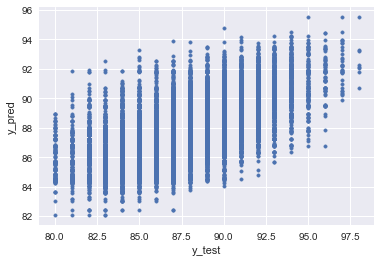

In [39]:
plt.scatter(y_test, y_pred, marker='.')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [40]:
# Top 10 features (words that influence the review points)
sorted(zip(model.feature_importances_, ['price','Argentina','Australia','Austria','Chile',
                                        'France','Germany','Italy','New Zealand','Portugal',
                                        'South Africa','Spain','US']))

[(0.00079569110167723224, 'South Africa'),
 (0.00089153135515160906, 'New Zealand'),
 (0.001018460320502002, 'Australia'),
 (0.0015040387894732165, 'France'),
 (0.0016238927028771216, 'Germany'),
 (0.0023512890320798257, 'Chile'),
 (0.0027930358623121684, 'Italy'),
 (0.0039193404494029197, 'Austria'),
 (0.005396043925774174, 'Argentina'),
 (0.0069546063440394552, 'Spain'),
 (0.010542218291129196, 'Portugal'),
 (0.022504491144989553, 'US'),
 (0.93970536068059152, 'price')]

### DT Regession without the feature 'price'

In [41]:
X = wine_country_cap_dummy[['Argentina','Australia','Austria','Chile',
                            'France','Germany','Italy','New Zealand',
                            'Portugal','South Africa','Spain','US']]
X = np.array(X)
y = wine_country_cap_dummy['points']
y = np.array(y)

In [42]:
# create different sets for ML
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [43]:
# create the validation set
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [44]:
# new training set is smaller:
print('size of original trainnig set:                ', X_train.shape)
print('size of new (after vali. split) trainnig set: ', X_train2.shape)

size of original trainnig set:                 (113529, 12)
size of new (after vali. split) trainnig set:  (90823, 12)


In [45]:
DT_validation_n_leafs([1,5,10,50,100,1000], X_train=X_train2,X_test=X_validation,
                      y_train=y_train2,y_test=y_validation)

Calculating model 1 of 6
Calculating model 5 of 6
Calculating model 10 of 6
Calculating model 50 of 6
Calculating model 100 of 6
Calculating model 1000 of 6


,MAE over test set,MAE over training set,MSE over test set,MSE over training set,R^2 over test set,R^2 over training set
1,2.532813,2.525564,9.684989,9.66715,0.043644,0.047376
5,2.532813,2.525564,9.684989,9.66715,0.043644,0.047376
10,2.532813,2.525564,9.684989,9.66715,0.043644,0.047376
50,2.532813,2.525564,9.684989,9.66715,0.043644,0.047376
100,2.532813,2.525564,9.684989,9.66715,0.043644,0.047376
1000,2.532813,2.525564,9.684989,9.66715,0.043644,0.047376


In [46]:
# build model - fit - predict
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
# MAE evaluation
y_training_pred = model.predict(X_train)
print('MAE over training set:', mean_absolute_error(y_training_pred, y_train))
print('MAE over test set:    ', mean_absolute_error(y_pred, y_test))
print('----------------------------')
# MSE evaluation
print('MSE over training set:', mean_squared_error(y_training_pred, y_train))
print('MSE over test set:    ', mean_squared_error(y_pred, y_test))
print('----------------------------')
# R squared evaluation
print('R^2 over training set:', model.score(X_train, y_train))
print('R^2 over test set:    ', model.score(X_test, y_test))

MAE over training set: 2.52689728174
MAE over test set:     2.52975911409
----------------------------
MSE over training set: 9.67044902176
MSE over test set:     9.71689004009
----------------------------
R^2 over training set: 0.0466803422389
R^2 over test set:     0.0440918553543


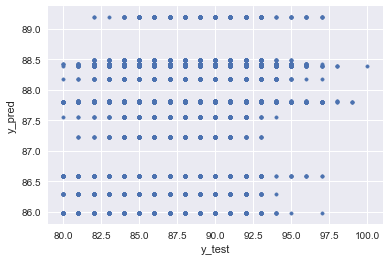

In [48]:
plt.scatter(y_test, y_pred, marker='.')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [49]:
# Top 10 features (words that influence the review points)
sorted(zip(model.feature_importances_, ['Argentina','Australia','Austria','Chile',
                                        'France','Germany','Italy','New Zealand',
                                        'Portugal','South Africa','Spain','US']))

[(0.0, 'France'),
 (0.00012809525766202453, 'Italy'),
 (0.00024997335975926032, 'Germany'),
 (0.0033682663456316695, 'Portugal'),
 (0.021791001911730532, 'Australia'),
 (0.027752424389815365, 'Austria'),
 (0.031208506878734485, 'New Zealand'),
 (0.04022701153467264, 'South Africa'),
 (0.10136298711526476, 'US'),
 (0.23138734688421358, 'Chile'),
 (0.24453118002255378, 'Spain'),
 (0.2979932062999619, 'Argentina')]

### DT Regression - with additional feature 'description'

In [50]:
# Step 1: Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
# Problem = Description with a lot of words

In [52]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=20)
X_counts = count_vectorizer.fit_transform(wine_country_cap_dummy['description'])

In [53]:
print(X_counts.shape)
print(type(X_counts))

(133564, 6547)
<class 'scipy.sparse.csr.csr_matrix'>


In [54]:
# create different sets for ML
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.15)

In [55]:
# create the validation set
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [56]:
# new training set is smaller:
print('size of original trainnig set:                ', X_train.shape)
print('size of new (after vali. split) trainnig set: ', X_train2.shape)

size of original trainnig set:                 (113529, 6547)
size of new (after vali. split) trainnig set:  (90823, 6547)


In [57]:
DT_validation_n_leafs([1,5,10,50,100,1000], X_train=X_train2,X_test=X_validation,
                      y_train=y_train2,y_test=y_validation)

Calculating model 1 of 6
Calculating model 5 of 6
Calculating model 10 of 6
Calculating model 50 of 6
Calculating model 100 of 6
Calculating model 1000 of 6


,MAE over test set,MAE over training set,MSE over test set,MSE over training set,R^2 over test set,R^2 over training set
1,1.204087,0.000114,4.676131,0.000083,0.539408,0.999992
5,1.694193,1.044003,5.173161,1.963795,0.490451,0.806223
10,1.787933,1.427672,5.367365,3.408733,0.471322,0.663644
50,1.895566,1.819872,5.828445,5.357403,0.425906,0.471360
100,1.944167,1.904686,6.074176,5.823821,0.401702,0.425336
1000,2.152558,2.151545,7.296395,7.289760,0.281315,0.280685


In [58]:
# build model - fit - predict with optimal sample parameter
model = DecisionTreeRegressor(min_samples_leaf=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
# MAE evaluation
y_training_pred = model.predict(X_train)
print('MAE over training set:', mean_absolute_error(y_training_pred, y_train))
print('MAE over test set:    ', mean_absolute_error(y_pred, y_test))
print('----------------------------')
# MSE evaluation
print('MSE over training set:', mean_squared_error(y_training_pred, y_train))
print('MSE over test set:    ', mean_squared_error(y_pred, y_test))
print('----------------------------')
# R squared evaluation
print('R^2 over training set:', model.score(X_train, y_train))
print('R^2 over test set:    ', model.score(X_test, y_test))

MAE over training set: 1.38859354978
MAE over test set:     1.75133886729
----------------------------
MSE over training set: 3.24923384848
MSE over test set:     5.17217563014
----------------------------
R^2 over training set: 0.67949770601
R^2 over test set:     0.492948330857


In [60]:
# Top 10 features (words that influence the review points)
sorted(zip(model.feature_importances_, count_vectorizer.get_feature_names()),reverse=True)[:10]

[(0.091758190665322176, 'years'),
 (0.052612742272421818, 'rich'),
 (0.042738105346079788, 'simple'),
 (0.037413950831414314, 'long'),
 (0.031025037696128202, 'vineyard'),
 (0.028501605809707189, 'black'),
 (0.023226336103367353, 'complex'),
 (0.02147625529429785, 'delicious'),
 (0.0191892337067326, 'elegant'),
 (0.017838145628828753, 'beautiful')]

### SGDRegressor - with additional feature 'description'

In [61]:
from sklearn.linear_model import SGDRegressor

In [62]:
# create different sets for ML
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.15)

In [63]:
# create the validation set
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [64]:
# new training set is smaller:
print('size of original trainnig set:                ', X_train.shape)
print('size of new (after vali. split) trainnig set: ', X_train2.shape)

size of original trainnig set:                 (113529, 6547)
size of new (after vali. split) trainnig set:  (90823, 6547)


In [65]:
def SGDRegressor_validation_eta0(inputs, X_test, X_train, y_train, y_test):
    '''
    function to analyse different parameters for the Dicision Tree Regression
    outputs a matrix with various validation metrics
    '''
     
    mae_train = []
    mae_test = []
    mse_train = []
    mse_test = []
    rsq_train = []
    rsq_test = []
    
    for i in inputs:
        model = SGDRegressor(eta0=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        y_training_pred = model.predict(X_train)
        
        mae_train.append(mean_absolute_error(y_training_pred, y_train))
        mae_test.append(mean_absolute_error(y_pred, y_test))
        mse_train.append(mean_squared_error(y_training_pred, y_train))
        mse_test.append(mean_squared_error(y_pred, y_test))
        rsq_train.append(model.score(X_train, y_train))
        rsq_test.append(model.score(X_test, y_test))
        
        
    test_matrix = pd.DataFrame(
        {'MAE over training set': mae_train,
        'MAE over test set': mae_test,
        'MSE over training set': mse_train,
        'MSE over test set': mse_test,
        'R^2 over training set': rsq_train,
        'R^2 over test set': rsq_test},index=inputs)
    
    return test_matrix

In [66]:
SGDRegressor_validation_eta0([100,10,1,0.1,0.01,0.001,0.0001], X_train=X_train2,X_test=X_validation,y_train=y_train2,y_test=y_validation)

,MAE over test set,MAE over training set,MSE over test set,MSE over training set,R^2 over test set,R^2 over training set
100.0000,3.379255e+13,3.355633e+13,1.820966e+27,1.809933e+27,-1.782235e+26,-1.788818e+26
10.0000,4.040936e+12,4.104873e+12,2.599978e+25,2.665593e+25,-2.544677e+24,-2.634495e+24
1.0000,5.339776e+08,4.852164e+08,5.493583e+17,4.221377e+17,-5.376736e+16,-4.172129e+16
0.1000,5.560228e+00,5.289106e+00,4.927709e+01,4.445159e+01,-3.822898e+00,-3.393300e+00
0.0100,1.206970e+01,1.189353e+01,2.318140e+02,2.253165e+02,-2.168834e+01,-2.126879e+01
0.0010,1.575600e+01,1.564029e+01,3.876044e+02,3.844893e+02,-3.693602e+01,-3.700037e+01
0.0001,2.091959e+01,2.085080e+01,6.664171e+02,6.647784e+02,-6.422427e+01,-6.470228e+01


In [67]:
# build model - fit - predict with optimal sample parameter
model = SGDRegressor(eta0=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [68]:
model.score(X_train, y_train)

-2.288338838121637

In [69]:
# Top 10 features (words that influence the review points)
sorted(zip(model.coef_, count_vectorizer.get_feature_names()),reverse=True)[:10]

[(6.0941794327889518, 'feline'),
 (5.5506757117335521, 'porty'),
 (5.4861057658449104, 'slender'),
 (5.4823756032170241, 'watery'),
 (5.2648753319110799, 'harsh'),
 (5.1903073818009, 'scoury'),
 (5.1725670761625331, 'refreshment'),
 (5.1544426109585233, 'handful'),
 (5.0646842789643225, 'meursault'),
 (5.0104985607479664, 'vinegary')]

### ElasticNet Regression - with additional feature 'description'

In [70]:
from sklearn.linear_model import ElasticNet

In [71]:
# create different sets for ML
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.15)

In [72]:
# create the validation set
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [73]:
# new training set is smaller:
print('size of original trainnig set:                ', X_train.shape)
print('size of new (after vali. split) trainnig set: ', X_train2.shape)

size of original trainnig set:                 (113529, 6547)
size of new (after vali. split) trainnig set:  (90823, 6547)


In [74]:
def ElasticNet_l1_ratio(inputs, X_test, X_train, y_train, y_test):
    '''
    function to analyse different parameters for the Dicision Tree Regression
    outputs a matrix with various validation metrics
    '''
     
    mae_train = []
    mae_test = []
    mse_train = []
    mse_test = []
    rsq_train = []
    rsq_test = []
    
    for i, j in inputs:
        model = ElasticNet(alpha=i, l1_ratio=j)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        y_training_pred = model.predict(X_train)
        
        mae_train.append(mean_absolute_error(y_training_pred, y_train))
        mae_test.append(mean_absolute_error(y_pred, y_test))
        mse_train.append(mean_squared_error(y_training_pred, y_train))
        mse_test.append(mean_squared_error(y_pred, y_test))
        rsq_train.append(model.score(X_train, y_train))
        rsq_test.append(model.score(X_test, y_test))
        
        
    test_matrix = pd.DataFrame(
        {'MAE over training set': mae_train,
        'MAE over test set': mae_test,
        'MSE over training set': mse_train,
        'MSE over test set': mse_test,
        'R^2 over training set': rsq_train,
        'R^2 over test set': rsq_test},index=inputs)
    
    return test_matrix

In [75]:
#ElasticNet_l1_ratio([(100,0),(10,0),(1,0),(0.1,0),(0.01,0),(0.001,0),(0,0),
#                    (100,0.5),(10,0.5),(1,0.5),(0.1,0.5),(0.01,0.5),(0.001,0.5),(0,0.5),
#                    (100,1),(10,1),(1,1),(0.1,1),(0.01,1),(0.001,1),(0,1)], 
#                    X_train=X_train2,X_test=X_validation,y_train=y_train2,y_test=y_validation)

In [76]:
# build model - fit - predict with optimal sample parameter
model = ElasticNet(alpha=1, l1_ratio=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
model.score(X_train, y_train)

0.0

In [78]:
# Top 10 features (words that influence the review points)
sorted(zip(model.coef_, count_vectorizer.get_feature_names()),reverse=True)[:10]

[(0.0, 'zweigelt'),
 (-0.0, 'zonin'),
 (0.0, 'zone'),
 (-0.0, 'zippy'),
 (-0.0, 'zip'),
 (0.0, 'zins'),
 (0.0, 'zinny'),
 (-0.0, 'zingy'),
 (0.0, 'zing'),
 (0.0, 'zinfandels')]

### LinearSV Regression - with additional feature 'description'

In [79]:
from sklearn.svm import LinearSVR

In [80]:
# create different sets for ML
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.15)

In [81]:
# create the validation set
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [82]:
# new training set is smaller:
print('size of original trainnig set:                ', X_train.shape)
print('size of new (after vali. split) trainnig set: ', X_train2.shape)

size of original trainnig set:                 (113529, 6547)
size of new (after vali. split) trainnig set:  (90823, 6547)


In [83]:
def LinearSVC_C(inputs, X_test, X_train, y_train, y_test):
    '''
    function to analyse different parameters for the Dicision Tree Regression
    outputs a matrix with various validation metrics
    '''
     
    mae_train = []
    mae_test = []
    mse_train = []
    mse_test = []
    rsq_train = []
    rsq_test = []
    
    for i in inputs:
        model = LinearSVR(C=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        y_training_pred = model.predict(X_train)
        
        mae_train.append(mean_absolute_error(y_training_pred, y_train))
        mae_test.append(mean_absolute_error(y_pred, y_test))
        mse_train.append(mean_squared_error(y_training_pred, y_train))
        mse_test.append(mean_squared_error(y_pred, y_test))
        rsq_train.append(model.score(X_train, y_train))
        rsq_test.append(model.score(X_test, y_test))
        print('Calculating model {0} of {1}'.format(i,len(inputs)))
        
    test_matrix = pd.DataFrame(
        {'MAE over training set': mae_train,
        'MAE over test set': mae_test,
        'MSE over training set': mse_train,
        'MSE over test set': mse_test,
        'R^2 over training set': rsq_train,
        'R^2 over test set': rsq_test},index=inputs)
    
    return test_matrix

In [84]:
LinearSVC_C([0.01,0.1,1,10,100,1000,10000],
            X_train=X_train2,X_test=X_validation,y_train=y_train2,y_test=y_validation)

Calculating model 0.01 of 7
Calculating model 0.1 of 7
Calculating model 1 of 7
Calculating model 10 of 7
Calculating model 100 of 7
Calculating model 1000 of 7
Calculating model 10000 of 7


,MAE over test set,MAE over training set,MSE over test set,MSE over training set,R^2 over test set,R^2 over training set
0.01,1.548421,1.504236,4.050637,3.876618,0.600243,0.618176
0.10,1.323737,1.220256,2.968106,2.649634,0.707078,0.739027
1.00,1.343200,1.190873,3.092029,2.621300,0.694848,0.741817
10.00,1.359455,1.200145,3.169713,2.654437,0.687181,0.738554
100.00,1.596182,1.480355,4.175776,3.636551,0.587893,0.641821
1000.00,1.779587,1.682067,5.108345,4.551581,0.495857,0.551696
10000.00,1.873564,1.783962,5.652069,5.100676,0.442197,0.497614


In [85]:
# build model - fit - predict with optimal sample parameter
model = LinearSVR(C=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [86]:
print(model.score(X_train, y_train))
print(model.get_params)

0.736964728517
<bound method BaseEstimator.get_params of LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)>


In [87]:
sorted(zip(model.coef_, count_vectorizer.get_feature_names()),reverse=True)[:20]

[(1.5400276505377395, 'rancio'),
 (1.401766417273008, 'brunello'),
 (1.3999999999999999, 'masterpiece'),
 (1.3680183240927999, 'exquisitely'),
 (1.3520493432811418, 'goldeneye'),
 (1.3462620867271742, 'dazzlingly'),
 (1.3270681844076044, 'gorgeous'),
 (1.3068612976838165, 'fabulous'),
 (1.3018131654462801, 'immense'),
 (1.2673947656492721, 'fascinating'),
 (1.2636381517186868, '2025'),
 (1.262586949878866, 'dazzling'),
 (1.2440092706892492, 'decadently'),
 (1.2390350662770835, 'fabulously'),
 (1.2368858826274447, 'impressively'),
 (1.2348917290608084, 'sainte'),
 (1.2307231304513615, 'extraordinary'),
 (1.2134874686619079, 'forever'),
 (1.2092650076266644, 'beautiful'),
 (1.200696502058199, 'impressive')]

## Additional Plots

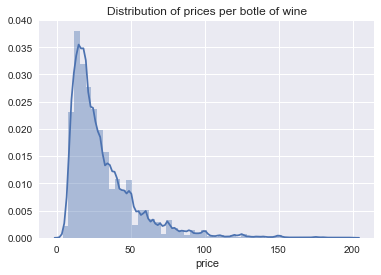

In [88]:
sns.distplot(wine_country_cap_dummy['price'])
sns.plt.title('Distribution of prices per botle of wine')
sns.plt.savefig('price_dist.png')

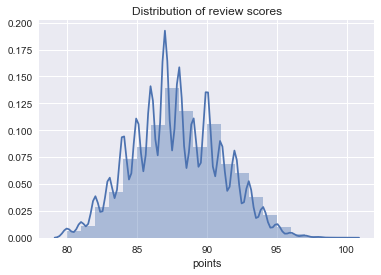

In [89]:
sns.distplot(wine_country_cap_dummy['points'], bins=20)
sns.plt.title('Distribution of review scores')
#sns.plt.savefig('price_dist.png')